In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [38]:
# Load the datasets
tesla_df = pd.read_csv('./datasets/new/redatasets/Tesla.csv')
hyundai_df = pd.read_csv('./datasets/new/redatasets/Hyundai.csv')

In [39]:
print("Tesla Stock Prices:")
tesla_df.head(3)

Tesla Stock Prices:


,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,147500.0000,148534.7782,149681.5652,445332.0000,23.889999,18766300
1,6/30/2010,147523.0371,149114.6704,149805.2698,445358.2493,23.830000,17187100
2,07/01/2010,147547.1683,148966.1859,149791.8498,445418.4336,21.959999,8218800


In [40]:
print("\nHyundai Stock Prices:")
hyundai_df.head(3)


Hyundai Stock Prices:


,Date,Open,High,Low,Close,Adj Close,Volume
0,6/29/2010,147500,148000,143500,347500.2442,117625.1094,445332.0000
1,6/30/2010,143000,145000,142000,143000.0000,117216.7031,445341.8953
2,7/1/2010,144000,145000,139000,347501.4044,114357.7266,445343.8587


In [41]:
print("\nData Types of Tesla datasets:")
print(tesla_df.dtypes)


Data Types of Tesla datasets:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [42]:
print("\nData Types of Hyundai datasets:")
print(tesla_df.dtypes)


Data Types of Hyundai datasets:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [43]:
# Convert 'Date' column to datetime
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])
hyundai_df['Date'] = pd.to_datetime(hyundai_df['Date'])

# Sort data by date
tesla_df.sort_values('Date', inplace=True)
hyundai_df.sort_values('Date', inplace=True)

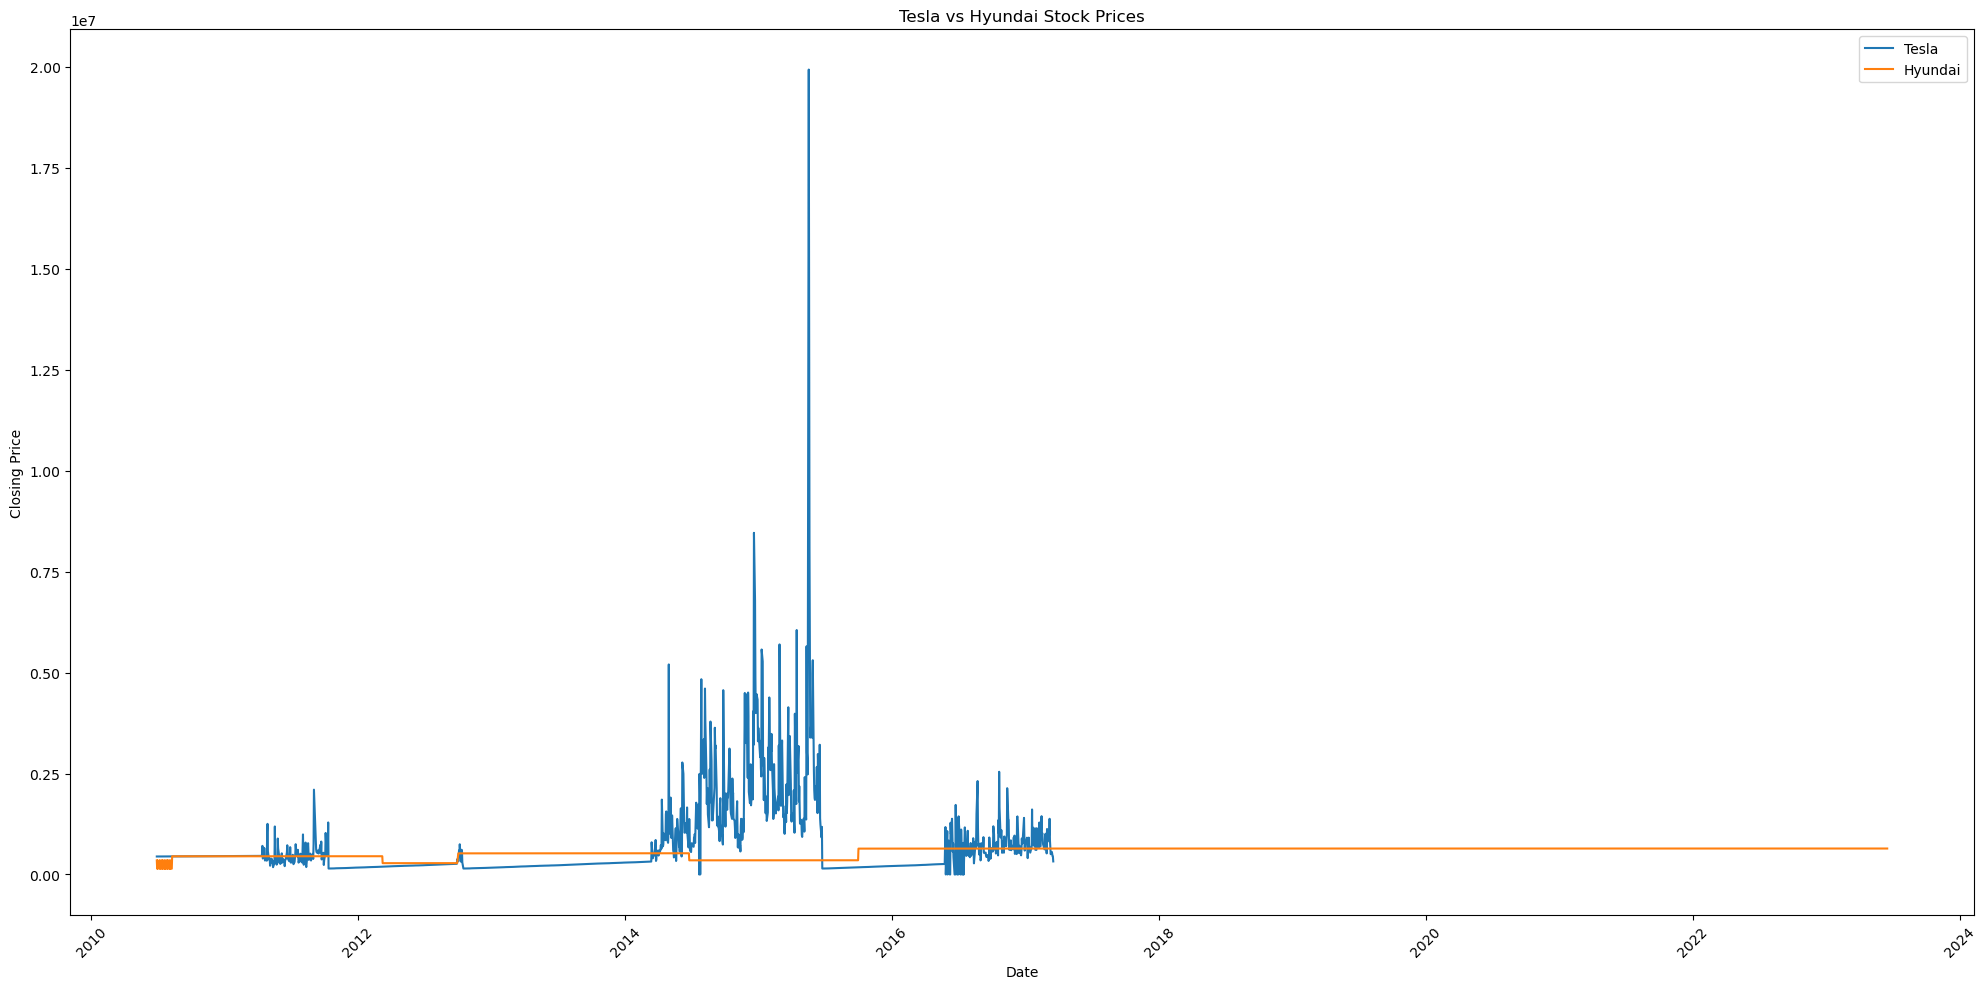

In [44]:
# Visualize the stock prices
plt.figure(figsize=(20, 10))

plt.plot(tesla_df['Date'], tesla_df['Close'], label='Tesla')
plt.plot(hyundai_df['Date'], hyundai_df['Close'], label='Hyundai')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tesla vs Hyundai Stock Prices')
plt.legend()
plt.xticks(rotation=45)  # Adjust rotation for better readability
plt.tight_layout()  # Helps prevent cut-off labels
plt.show()

In [45]:
# Merge the datasets for comparison
merged_df = pd.merge(tesla_df, hyundai_df, on='Date', suffixes=('_tesla', '_hyundai'))

In [46]:
# Prepare the data for neural network training
data = merged_df[['Close_tesla', 'Close_hyundai']]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [47]:
# Split the data into training and testing sets
train_data = scaled_data[:-31]
test_data = scaled_data[-31:]

In [48]:
# Define the features and labels
X_train, y_train = train_data[:-1], train_data[1:]

# Reshape the input data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

In [49]:
# Define the features and labels
X_train, y_train = train_data[:-1], train_data[1:]

# Reshape the input data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])

In [50]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, 2)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')

In [51]:

# Train the model
history = model.fit(X_train, y_train, epochs=50, verbose=0)

In [52]:
# Extract the columns for visualization
columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
tesla_data = tesla_df[columns_to_plot]
hyundai_data = hyundai_df[columns_to_plot]

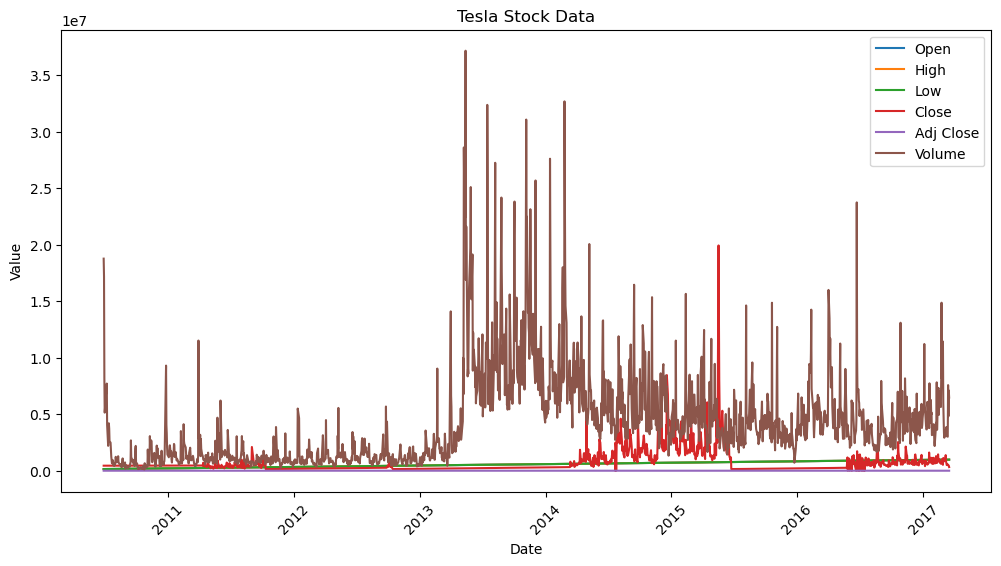

In [53]:
# Visualize the data for Tesla
plt.figure(figsize=(12, 6))
for column in columns_to_plot:
    plt.plot(tesla_df['Date'], tesla_data[column], label=column)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Tesla Stock Data')
plt.legend()
plt.xticks(rotation=45)
plt.show()

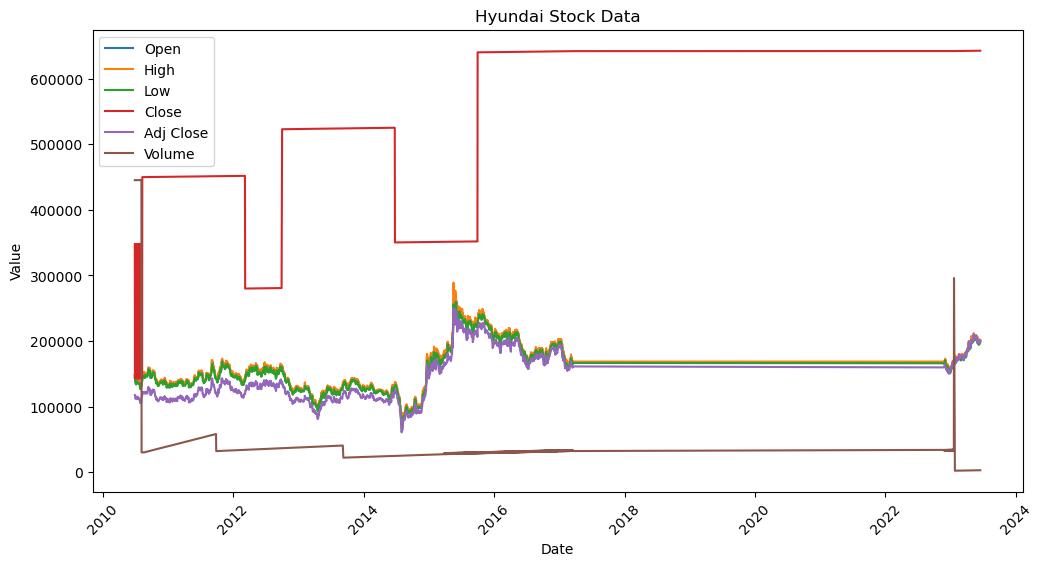

In [54]:
# Visualize the data for Hyundai
plt.figure(figsize=(12, 6))
for column in columns_to_plot:
    plt.plot(hyundai_df['Date'], hyundai_data[column], label=column)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Hyundai Stock Data')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [55]:
# Make predictions with the model
X_test = test_data[:-1]
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
predicted_data = model.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

1/1 [==============================] - 0s 149ms/step


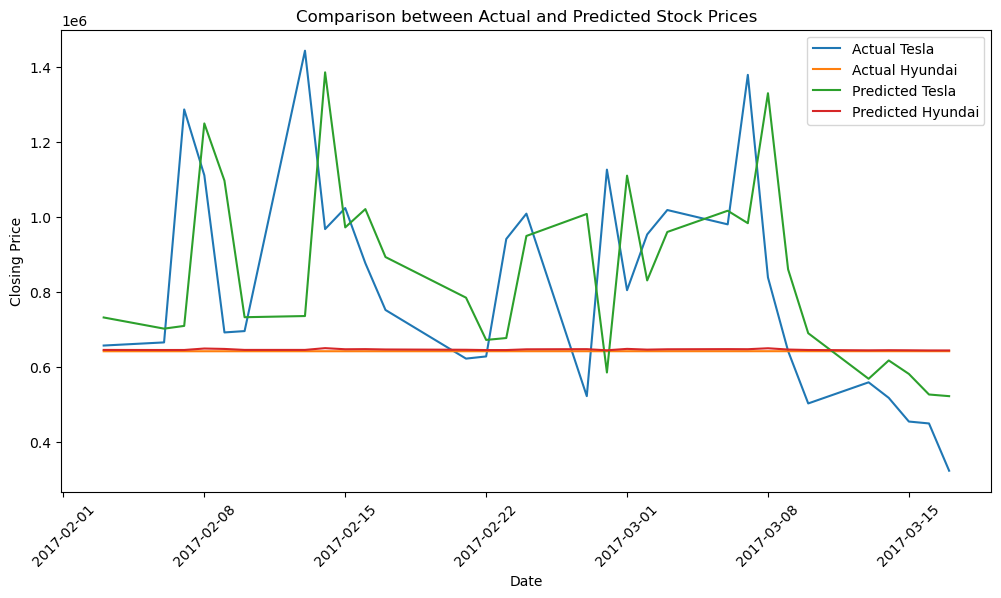

In [56]:
# Compare the datasets and predicted data
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'][-30:], merged_df['Close_tesla'][-30:], label='Actual Tesla')
plt.plot(merged_df['Date'][-30:], merged_df['Close_hyundai'][-30:], label='Actual Hyundai')
plt.plot(merged_df['Date'][-30:], predicted_data[:, 0], label='Predicted Tesla')
plt.plot(merged_df['Date'][-30:], predicted_data[:, 1], label='Predicted Hyundai')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Comparison between Actual and Predicted Stock Prices')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [57]:
# Calculate prediction errors
actual_tesla = merged_df['Close_tesla'][-30:].values
actual_hyundai = merged_df['Close_hyundai'][-30:].values
prediction_tesla = predicted_data[:, 0]
prediction_hyundai = predicted_data[:, 1]

In [58]:
# Calculate error metrics
mse_tesla = mean_squared_error(actual_tesla, prediction_tesla)
mse_hyundai = mean_squared_error(actual_hyundai, prediction_hyundai)
mae_tesla = mean_absolute_error(actual_tesla, prediction_tesla)
mae_hyundai = mean_absolute_error(actual_hyundai, prediction_hyundai)

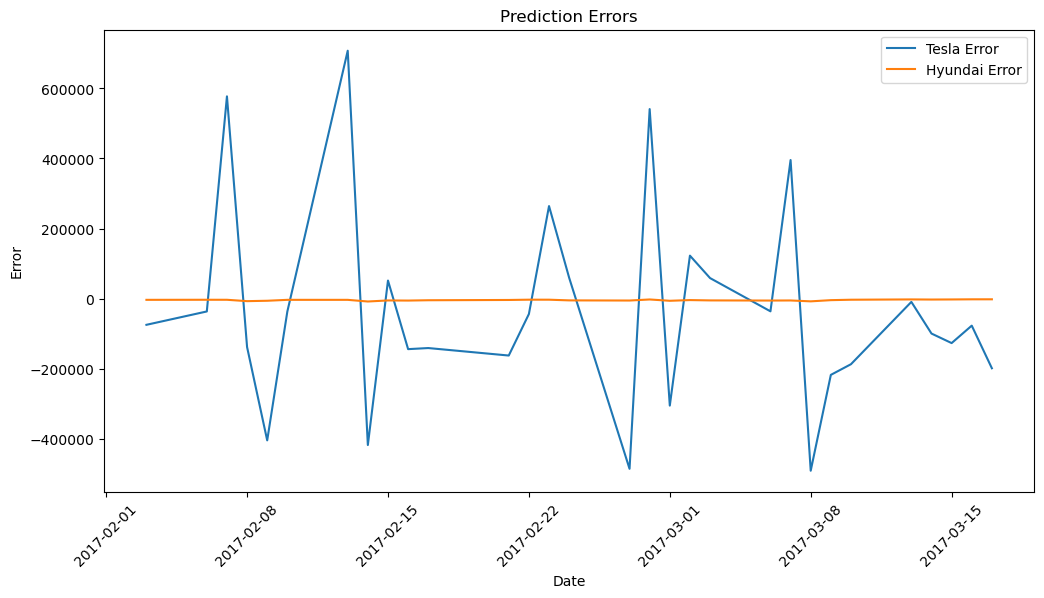

Mean Squared Error (Tesla): 84651342844.32123
Mean Absolute Error (Tesla): 220549.35208333333
Mean Squared Error (Hyundai): 22129752.373505697
Mean Absolute Error (Hyundai): 4397.499600000008


In [59]:
# Visualize the prediction errors
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'][-30:], actual_tesla - prediction_tesla, label='Tesla Error')
plt.plot(merged_df['Date'][-30:], actual_hyundai - prediction_hyundai, label='Hyundai Error')
plt.xlabel('Date')
plt.ylabel('Error')
plt.title('Prediction Errors')
plt.legend()
plt.xticks(rotation=45)
plt.show()

print("Mean Squared Error (Tesla):", mse_tesla)
print("Mean Absolute Error (Tesla):", mae_tesla)
print("Mean Squared Error (Hyundai):", mse_hyundai)
print("Mean Absolute Error (Hyundai):", mae_hyundai)